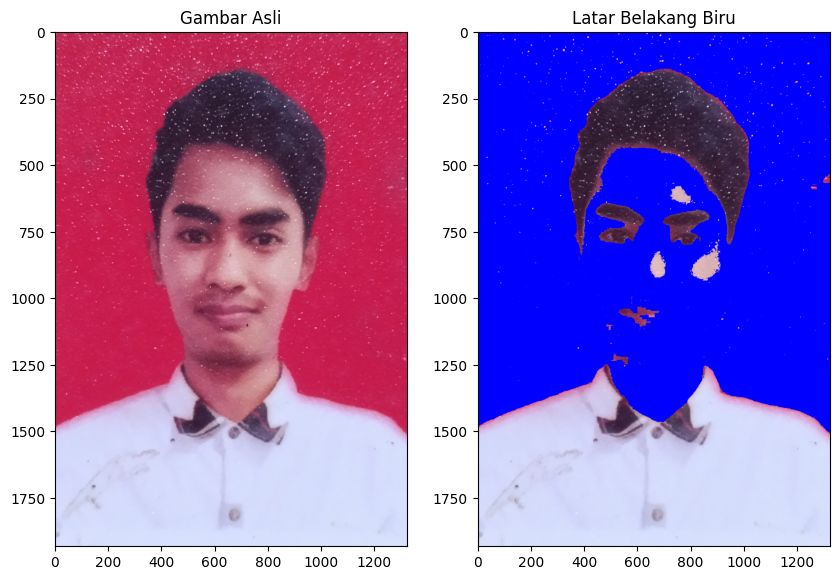

Gambar dengan latar belakang biru disimpan di /mnt/data/blue_background.jpg


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("foto.jpg")

# Konversi warna BGR ke HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Tentukan rentang warna merah dalam ruang warna HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Buat masker untuk mendeteksi warna merah
mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(mask1, mask2)

# Invers masker untuk mendapatkan area non-merah
non_red_mask = cv2.bitwise_not(red_mask)

# Ganti warna merah menjadi biru
blue_background = image.copy()
blue_background[:, :] = [255, 0, 0]  # Warna biru dalam BGR
result = cv2.bitwise_and(blue_background, blue_background, mask=red_mask)
final_image = cv2.bitwise_or(result, cv2.bitwise_and(image, image, mask=non_red_mask))

# Tampilkan hasil
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Gambar Asli")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Latar Belakang Biru")
plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
plt.show()

# Simpan gambar hasil
output_path = "/mnt/data/blue_background.jpg"
cv2.imwrite(output_path, final_image)
print(f"Gambar dengan latar belakang biru disimpan di {output_path}")